In [1]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")  # silence LAL warnings
from pyseobnr.generate_waveform import GenerateWaveform, generate_modes_opt
import lal
import lalsimulation as lalsim
import numpy as np
import bilby
from matplotlib import pyplot as plt

In [3]:
m1=100
m2=100
s1x=0.
s1y=0.
s1z=0.
s2x=0.
s2y=0.
s2z=0.
fRef=40
fmax=1024
phiRef=np.pi/3
distance=500
inclination=np.pi/4
deltaF = 1/8.
hp, hc = bilby.gw.utils.lalsim_SimInspiralChooseFDWaveform(mass_1=m1 * lal.MSUN_SI, mass_2=m2 * lal.MSUN_SI,
                                            reference_frequency=fRef, minimum_frequency=fRef, maximum_frequency=fmax,
                                            eccentricity=0.1, mean_per_ano=1.5, longitude_ascending_nodes=0.,
                                            spin_1x=s1x, spin_2x=s2x,
                                            spin_1y=s1y, spin_2y=s2y,
                                            spin_1z=s1z, spin_2z=s2z,
                                            luminosity_distance=distance, iota=inclination,
                                            delta_frequency=deltaF, phase=0., 
                                            waveform_dictionary=None,
                                            approximant=lalsim.TaylorF2Ecc)

/home/snehal.tibrewal/.conda/envs/pyseobnr-EHM-PHM-bilby-20022025/lib/python3.11/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/snehal.tibrewal/.conda/envs/pyseobnr-EHM-PHM-bilby-20022025/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


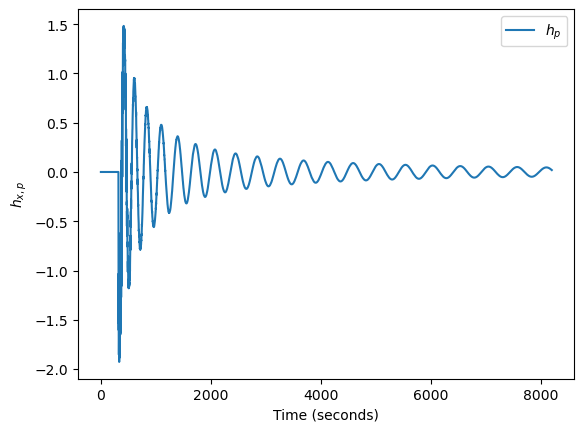

In [4]:
plt.plot(hp.data.data, label=r"$h_p$")
#plt.plot(hc.data.data, label=r"$h_x$")
plt.xlabel("Time (seconds)")
plt.ylabel(r"$h_{x,p}$")
plt.legend()

Text(0.5, 0.98, 'TaylorF2Ecc(FD) via LAL')

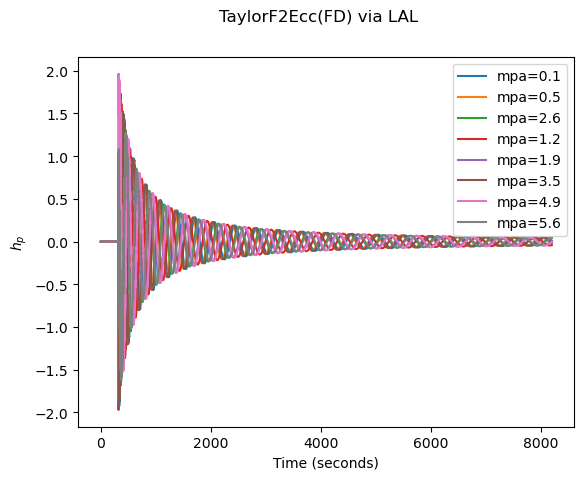

In [5]:
for mpa in {0.1, 0.5, 1.2, 1.9, 2.6, 3.5, 4.9, 5.6}:
    hp, hc = bilby.gw.utils.lalsim_SimInspiralChooseFDWaveform(mass_1=m1 * lal.MSUN_SI, mass_2=m2 * lal.MSUN_SI,
                                            reference_frequency=fRef, minimum_frequency=fRef, maximum_frequency=fmax,
                                            eccentricity=0.1, mean_per_ano=0., longitude_ascending_nodes=mpa,
                                            spin_1x=s1x, spin_2x=s2x,
                                            spin_1y=s1y, spin_2y=s2y,
                                            spin_1z=s1z, spin_2z=s2z,
                                            luminosity_distance=distance, iota=inclination,
                                            delta_frequency=deltaF, phase=0., 
                                            waveform_dictionary=None,
                                            approximant=lalsim.TaylorF2Ecc)
    plt.plot(hp.data.data, label='mpa='+str(mpa))
    #plt.xlim(200,400)
    plt.xlabel("Time (seconds)")
    plt.ylabel(r"$h_{p}$")
    plt.legend()
plt.suptitle('TaylorF2Ecc(FD) via LAL')
    

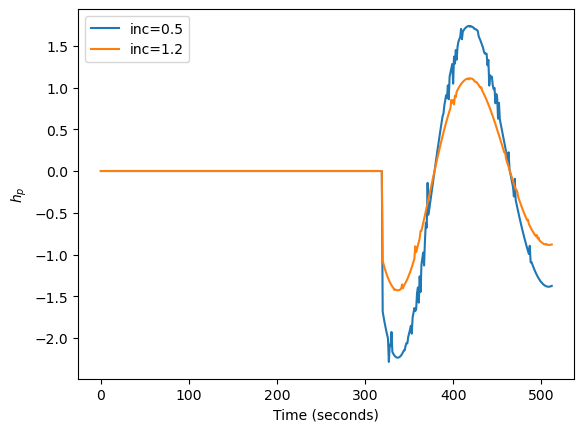

In [7]:
for inc in {0.5,1.2}:
    hp, hc = bilby.gw.utils.lalsim_SimInspiralChooseFDWaveform(mass_1=m1 * lal.MSUN_SI, mass_2=m2 * lal.MSUN_SI,
                                            reference_frequency=fRef, minimum_frequency=fRef, maximum_frequency=fmax,
                                            eccentricity=0.1, mean_per_ano=0., longitude_ascending_nodes=0.,
                                            spin_1x=s1x, spin_2x=s2x,
                                            spin_1y=s1y, spin_2y=s2y,
                                            spin_1z=s1z, spin_2z=s2z,
                                            luminosity_distance=distance, iota=inc,
                                            delta_frequency=deltaF, phase=0., 
                                            waveform_dictionary=None,
                                            approximant=lalsim.TaylorF2Ecc)
    plt.plot(hp.data.data, label='inc='+str(inc))
    #plt.xlim(200,400)
    plt.xlabel("Time (seconds)")
    plt.ylabel(r"$h_{p}$")
    plt.legend()

Text(0.5, 0.98, 'EccentricFD(FD) via LAL')

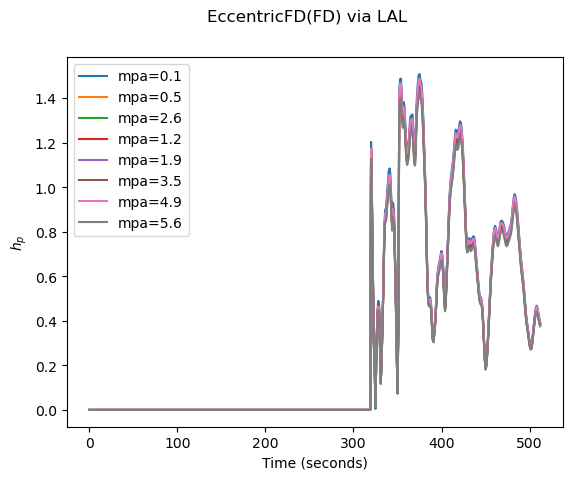

In [9]:
fmax=64
for mpa in {0.1, 0.5, 1.2, 1.9, 2.6, 3.5, 4.9, 5.6}:
    hp, hc = bilby.gw.utils.lalsim_SimInspiralChooseFDWaveform(mass_1=m1 * lal.MSUN_SI, mass_2=m2 * lal.MSUN_SI,
                                            reference_frequency=fRef, minimum_frequency=fRef, maximum_frequency=fmax,
                                            eccentricity=0.3, mean_per_ano=0., longitude_ascending_nodes=mpa,
                                            spin_1x=s1x, spin_2x=s2x,
                                            spin_1y=s1y, spin_2y=s2y,
                                            spin_1z=s1z, spin_2z=s2z,
                                            luminosity_distance=distance, iota=inclination,
                                            delta_frequency=deltaF, phase=0., 
                                            waveform_dictionary=None,
                                            approximant=lalsim.EccentricFD)
    plt.plot(np.abs(hp.data.data), label='mpa='+str(mpa))
    #plt.xlim(200,400)
    plt.xlabel("Time (seconds)")
    plt.ylabel(r"$h_{p}$")
    plt.legend()
plt.suptitle('EccentricFD(FD) via LAL')

## Time Domain

In [2]:
import lalsimulation as lalsim
import lal
import numpy as np
import matplotlib.pyplot as plt

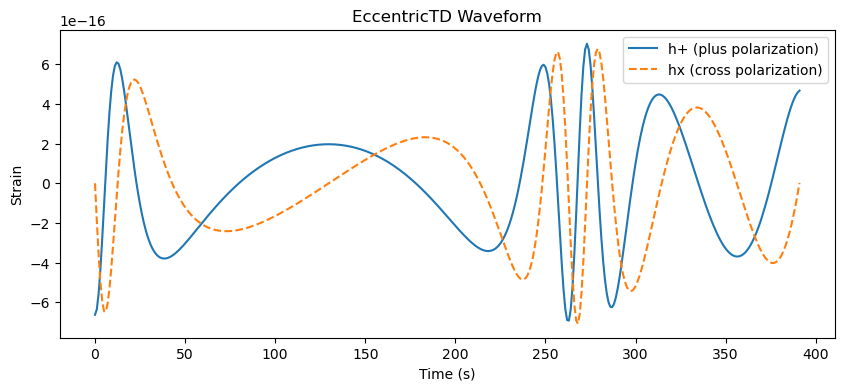

In [10]:
# Generate the waveform
hp, hc = lalsim.SimInspiralChooseTDWaveform(
        m1=20*lal.MSUN_SI,
        m2=20*lal.MSUN_SI,
        s1x=0,
        s1y=0,
        s1z=0,
        s2x=0,
        s2y=0,
        s2z=0,
        distance=500*lal.PC_SI,
        inclination=0,
        phiRef=0,
        longAscNodes=0,
        eccentricity=0.4,
        meanPerAno=2,
        deltaT=1./4096,
        f_min=40,
        f_ref=40,
        params=lal.CreateDict(),
        approximant=lalsim.EccentricTD
    )


# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(hp.data.data, label="h+ (plus polarization)")
plt.plot(hc.data.data, label="hx (cross polarization)", linestyle="dashed")
plt.xlabel("Time (s)")
plt.ylabel("Strain")
plt.legend()
plt.title("EccentricTD Waveform")
plt.show()


Text(0.5, 0.98, 'EccentricTD via LAL')

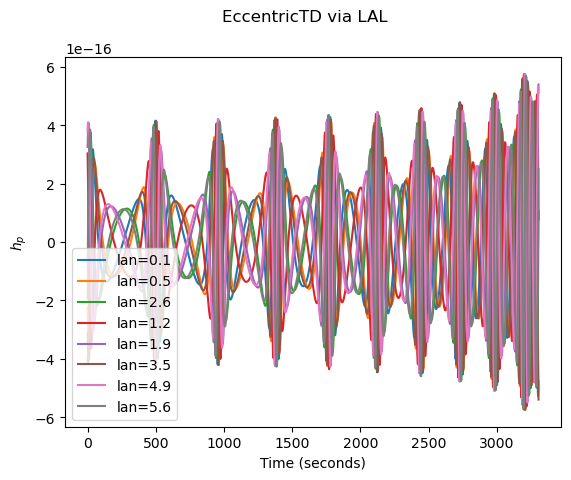

In [12]:
for mpa in {0.1, 0.5, 1.2, 1.9, 2.6, 3.5, 4.9, 5.6}:
    hp, hc = lalsim.SimInspiralChooseTDWaveform(
        m1=20*lal.MSUN_SI,
        m2=20*lal.MSUN_SI,
        s1x=0,
        s1y=0,
        s1z=0,
        s2x=0,
        s2y=0,
        s2z=0,
        distance=500*lal.PC_SI,
        inclination=0,
        phiRef=0,
        longAscNodes=mpa,
        eccentricity=0.4,
        meanPerAno=0.,
        deltaT=1./4096,
        f_min=20,
        f_ref=20,
        params=lal.CreateDict(),
        approximant=lalsim.EccentricTD
    )
    plt.plot(hp.data.data, label='lan='+str(mpa))
    #plt.xlim(200,400)
    plt.xlabel("Time (seconds)")
    plt.ylabel(r"$h_{p}$")
    plt.legend()
plt.suptitle('EccentricTD via LAL')

In [21]:
params=lal.CreateDict()